In [29]:
################################################################################
# Import modules
#-------------------------------------------------------------------------------
import numpy as np
import numpy.ma as ma
from astropy.table import Table, QTable
import csv


import time


# Import functions from other .py files
from Velocity_Map_Functions import find_phi

from RC_2D_Fit_Functions import Galaxy_Data, \
                                Galaxy_Fitting_iso,\
                                Galaxy_Fitting_NFW, \
                                Galaxy_Fitting_bur, \
                                Hessian_Calculation_Isothermal,\
                                Hessian_Calculation_NFW,\
                                Hessian_Calculation_Burket,\
                                Plotting_Isothermal,\
                                Plotting_NFW,\
                                Plotting_Burket,\
                                getTidal,\
                                deproject_spaxel,\
                                plot_rot_curve,\
                                plot_diagnostic_panel

from Velocity_Map_Functions_cython import rot_incl_iso,\
                                          rot_incl_NFW, \
                                          rot_incl_bur

from mapSmoothness_functions import how_smooth

from os import path

import matplotlib.pyplot as plt
################################################################################

In [30]:
################################################################################
# Physics Constants
#-------------------------------------------------------------------------------
c = 3E5 # km * s ^1
h = 1 # reduced hubble constant
H_0 =  100 * h # km * s^-1 * Mpc^-1
q0 = 0.2 # minimum inclination value
################################################################################

In [31]:
################################################################################
# Used files
#-------------------------------------------------------------------------------
MANGA_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'

DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/drpall-v3_1_1.fits'

# Can't really use this anymore
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v3_1_1/2.2.1/HYB10-GAU-MILESHC/'

MORPH_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/morph/'
#MORPH_FOLDER = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/morphology/manga_visual_morpho/1.0.1/'


DTable =  Table.read(DRP_FILENAME, format='fits')

#MTable =  Table.read(MORPH_file, format='fits')

DRP_index = {}

for i in range(len(DTable)):
    gal_ID = DTable['plateifu'][i]

    DRP_index[gal_ID] = i
################################################################################

In [40]:
m = DTable['nsa_elpetro_mass']
rat = DTable['nsa_elpetro_ba']
phi = DTable['nsa_elpetro_phi']
z = DTable['nsa_z']
r50_ang = DTable['nsa_elpetro_th50_r']
flag = DTable['mngtarg1']

In [66]:
galaxy_ID = []
plateifu = DTable['plateifu'].data

for i in range(len(plateifu)):
    galaxy_ID.append(str(plateifu[i],'utf-8'))

In [67]:
#galaxy_ID = ['8256-9102']

In [68]:
mngtarg1_list = []
rat_list =[]
incl_list = []
for i in range(len(galaxy_ID)):

    plate, IFU = galaxy_ID[i].split('-')

    data_file = VEL_MAP_FOLDER + plate + '/' + IFU + '/manga-' + galaxy_ID[i] + '-MAPS-HYB10-GAU-MILESHC.fits.gz'

    j = DRP_index[galaxy_ID[i]]

    redshift = z[j]
    velocity =  redshift* c
    distance = (velocity / H_0) * 1000 #kpc
    scale = 0.5 * distance / 206265

    #c_scale['scale'][i] = scale
    
    print(rat[j])
    
    mngtarg1_list.append(flag[j])
    rat_list.append(rat[j])
    

    #incl = np.arccos(rat[j])
    if rat[j] <= -999:
        continue
        
    cosi2 = (rat[j]**2 - q0**2)/(1 - q0**2)
    if cosi2 < 0:
        cosi2 = 0

    incl = np.arccos(np.sqrt(cosi2))
    incl_list.append(incl)

    #ph = phi[j] * np.pi / 180
    
    
    '''
    if path.exists(data_file):
        ########################################################################
        # Get data
        #-----------------------------------------------------------------------
        # scale, incl, ph, rband, Ha_vel, Ha_vel_ivar, Ha_vel_mask, vmasked, gshape, x_center_guess, y_center_guess = Galaxy_Data(galaxy_ID)
        data_maps, gshape, x_center_guess, y_center_guess = Galaxy_Data(galaxy_ID[i], 
                                                                        MANGA_FOLDER)
        #-----------------------------------------------------------------------
        
        # Morphological cut
        tidal = getTidal(galaxy_ID[i], MORPH_FOLDER)

        # Smoothness cut
        max_map_smoothness = 1.85

        map_smoothness = how_smooth(data_maps['Ha_vel'], data_maps['Ha_vel_mask'])

        SN_map = data_maps['Ha_flux'] * np.sqrt(data_maps['Ha_flux_ivar'])
        Ha_vel_mask = data_maps['Ha_vel_mask'] + (SN_map < 5)
        
        vmasked = ma.array(data_maps['Ha_vel'], mask = Ha_vel_mask)
        plt.imshow(vmasked,origin='lower',cmap='RdBu_r')
        plt.close()
    '''

0.417013
0.598115
0.378034
0.212315
0.541128
0.532468
0.839959
0.907966
0.948903
0.610528
0.933142
0.835313
0.581075
0.864315
0.630574
0.746946
0.819056
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0
-9999.0

0.69300497
0.9604831
0.8730132
0.8145774
0.4163431
0.8671272
0.64885575
0.8919397
0.4174525
0.74340904
0.6603782
0.6816449
0.8418149
0.674923
0.47398987
0.875743
0.86419815
0.7687928
0.80820936
0.8380808
0.9845261
0.8359551
0.62502813
0.8526704
0.7345514
0.913411
0.87698317
0.4854991
0.8073686
0.79347116
0.23346666
0.76535076
0.7261009
0.49536788
0.85081965
0.8229155
0.82676727
0.8574281
0.83396506
0.8261447
0.74183154
0.72283524
0.7647883
0.66982704
0.72468454
0.52928895
0.9512214
0.41700184
0.50650215
0.5739291
0.96191955
0.80796975
0.4598935
0.70792466
0.8020606
0.7944675
0.9679573
0.76657623
0.49846733
0.41523817
0.86391306
0.8258455
0.79601455
0.82364476
0.6934924
0.6302598
0.7699343
0.8986132
0.9079578
0.9623075
0.9350168
0.7387515
0.78141034
0.85980785
0.83410454
0.44228825
0.73041767
0.8024671
0.64178663
0.8228859
0.8083421
0.6186778
0.5999182
0.5542373
0.74219275
0.78389156
0.80226856
0.803098
0.7038885
0.8870539
0.9733436
0.9085189
0.8627783
0.80935186
0.8850364
0.5850553
0.3

0.7779662
0.7245137
0.9717391
0.8800008
0.79287606
0.9491736
0.6566513
0.85343957
0.69249654
0.8525405
0.39283583
0.64918023
0.96173763
0.35287592
0.8323815
0.9650442
0.68390477
0.31943038
0.2507721
0.9619422
0.5371257
0.61072934
0.8520328
0.92359424
0.6233386
0.5866687
0.78655833
0.88780963
0.40728068
0.73778486
0.41054958
0.7282216
0.8669529
0.8387157
0.96732324
0.47844872
0.9285994
0.7085683
0.83670896
0.5302809
0.83821195
0.8746778
0.34264588
0.6775465
0.88277346
0.3892558
0.83391553
0.9701429
0.82416517
0.67682666
0.8316999
0.7685663
0.91484445
0.25569338
0.8583816
0.5578566
0.65941083
0.7705318
0.5323455
0.8544912
0.691664
0.7736965
0.7915645
0.9518187
0.9358598
0.61993194
0.8335225
0.49331048
0.7849399
0.5546536
0.59190387
0.9451048
0.5741281
0.9597511
0.75942254
0.7119514
0.8607258
0.6169618
0.47326618
0.6678181
0.60831195
0.75862473
0.3501257
0.21144187
0.83866656
0.6131989
0.49842483
0.8529253
0.7398284
0.6965885
0.61930734
-9999.0
0.36362225
0.82067984
0.82810426
0.6099948
0

0.72063
0.534041
0.821528
0.57106
0.818059
0.598006
0.649876
0.271882
0.302255
0.623751
0.905793
0.868811
0.900588
0.853842
0.875112
0.425758
0.632792
0.867619
0.82531
0.555749
0.560097
0.63419
0.683874
0.582083
0.477194
0.900003
0.786943
0.916284
0.851417
0.97541
0.858291
0.885609
0.466397
0.655597
0.734954
0.863859
0.826299
0.944952
0.342607
0.72226
0.329429
0.610191
0.823344
0.891339
0.804642
0.894408
0.888035
0.650036
0.76331
0.874419
0.662781
0.936689
0.399449
0.399183
0.38493
0.387382
0.978166
0.553677
0.637957
0.871632
0.439398
0.645711
0.87872
0.853653
0.799867
0.801483
0.770334
0.545919
0.938407
0.713134
0.782913
0.660486
0.459955
0.790953
0.796022
0.634572
0.634972
0.447827
0.844756
0.783681
0.619452
0.708938
0.80024
0.390305
0.697827
0.783681
0.695118
0.954069
0.881543
0.684856
0.550796
0.570709
0.638941
0.854809
0.842735
0.836952
0.86463
0.790531
0.621547
0.926247
0.694129
0.436256
0.927896
0.923401
0.591707
0.79458
0.468583
0.640204
0.635862
0.550807
0.582925
0.605729
0.98

0.957962
0.691824
0.908641
0.751316
0.831404
0.798702
0.777796
0.927494
0.809256
0.880374
0.608956
0.526699
0.796842
0.607205
0.444969
0.844666
0.969302
0.859392
0.788846
0.638836
0.933317
0.923981
0.571587
0.725726
0.345553
0.872755
0.439643
0.550243
0.512614
0.786057
0.511491
0.65415
0.462887
0.715927
0.777895
0.60331
0.905124
0.833121
0.389349
0.869873
0.461213
0.814622
0.980661
0.909326
0.384837
0.332937
0.440884
0.656567
0.534964
0.650246
0.636479
0.897679
0.823218
0.617189
0.948444
0.799006
0.738644
0.925636
0.501856
0.516156
0.626256
0.703391
0.424544
0.843062
0.649378
0.860473
0.660378
0.646805
0.534506
0.610236
0.91082
0.756832
0.789997
0.697635
0.306772
0.779023
0.832265
0.854458
0.667717
0.521717
0.868321
0.53294
0.937747
0.475685
0.966453
0.512358
0.6253
0.87178
0.653639
0.549602
0.914444
0.778284
0.911408
0.556374
0.57774
0.318327
0.774444
0.480588
0.83081
0.300107
0.904414
0.796191
0.652792
0.536161
0.505184
0.941529
0.750937
0.753527
0.481683
0.569715
0.824147
0.376847
0

0.51619
0.845625
0.776015
0.554043
0.658154
0.854719
0.593388
0.265149
0.774159
0.776851
0.415224
0.873765
0.845203
0.747939
0.770537
0.568039
0.90019
0.752794
0.445553
0.749661
0.629818
0.597074
0.413725
0.904667
0.779552
0.447557
0.670221
0.720293
0.380928
0.876829
0.892287
0.763952
0.791107
0.65888
0.839642
0.852424
0.699415
0.796746
0.822455
0.77795
0.687509
0.710507
0.921614
0.883344
0.843589
0.853925
0.586768
0.867071
0.663568
0.805663
0.942381
0.659664
0.593471
0.566279
0.863758
0.805295
0.857464
0.324416
0.802947
0.310324
0.312622
0.703265
0.569028
0.833234
0.790169
0.690315
0.710803
0.835365
0.471431
0.949185
0.740005
0.455137
0.775033
0.719374
0.793222
0.258153
0.870447
0.915563
0.6094
0.525765
0.779481
0.949584
0.832612
0.977274
0.744768
0.962132
0.652279
0.77266
0.911046
0.873189
0.931227
0.763725
0.479054
0.765936
0.379837
0.67418
0.893667
0.732494
0.7966
0.768193
0.721921
0.641545
0.75373
0.676938
0.582079
0.680369
0.650042
0.874979
0.948416
0.966925
0.728306
0.524405
0.5

0.837798
0.735324
0.199388
0.801005
0.79638
0.651466
0.394707
0.392575
0.84138
0.939739
0.351207
0.589774
0.821873
0.648957
0.800614
0.470692
0.802695
0.934764
0.347766
0.340313
0.834313
0.614588
0.656741
0.736792
0.826761
0.768464
0.672816
0.952326
0.942566
0.804948
0.869435
0.960221
0.793028
0.85068
0.91632
0.571626
0.754036
0.494925
0.93118
0.168844
0.267714
0.895936
0.699587
0.772384
0.948474
0.906029
0.83218
0.854599
0.720823
0.874161
0.440218
0.803185
0.875248
0.581561
0.891781
0.475875
0.502874
0.842936
0.655486
0.609883
0.445999
0.960883
0.758701
0.667231
0.60672
0.962621
0.796959
0.856821
0.938793
0.506705
0.836469
0.263362
0.655889
0.69064
0.721838
0.522993
0.94266
-9999.0
0.845084
0.876224
0.828758
0.783001
0.562507
0.666423
0.622787
0.796926
0.597907
0.637675
0.6255
0.72184
0.760719
0.558665
0.681013
0.73574
0.674895
0.936133
0.955064
0.757547
0.952307
0.489133
0.728574
0.87237
0.811416
0.673791
0.828616
0.374125
0.745473
0.652181
0.604832
-9999.0
0.546532
0.65124
0.689303


0.590733
0.777804
0.876674
0.865891
0.962682
0.726838
0.916022
0.620461
0.628943
0.849678
0.857203
0.557026
0.811982
0.92147
0.930065
0.907962
0.719297
0.685433
0.543171
0.888557
0.869834
0.864512
0.562969
0.709213
0.740435
0.447624
0.651743
0.773768
0.771879
0.47188
0.493135
0.570998
0.69107
0.693243
0.688098
0.726168
0.747793
0.611982
0.859905
0.865466
0.89466
0.746071
0.838594
0.755307
0.555403
0.929032
0.902561
0.843847
0.580307
0.967882
0.731321
0.616239
0.827236
0.752233
0.75278
0.929692
0.958807
0.802964
0.62533
0.827084
0.725512
0.786093
0.521909
0.490174
0.87588
0.956559
0.657227
0.822772
0.803793
0.641208
0.686136
0.893895
0.785358
0.769554
0.526302
0.371367
0.396266
0.535025
0.78677
0.816439
0.716465
0.816901
0.680879
0.835503
0.828866
0.76525
0.276765
0.3454
0.674794
0.65181
0.493203
0.861094
0.494729
0.64139
0.511505
0.798639
0.854321
0.975296
0.800131
0.493508
0.509486
0.733367
0.697506
0.359836
0.859646
0.847962
0.652211
0.872203
0.483546
0.687249
0.830319
0.393675
0.737

In [69]:
mngtarg1_list

[2080,
 2080,
 2080,
 4160,
 2080,
 4608,
 1040,
 2080,
 1168,
 2336,
 1168,
 2336,
 1040,
 4288,
 1040,
 2080,
 2080,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2048,
 2080,
 2080,
 1040,
 1168,
 1040,
 4288,
 2048,
 2048,
 1168,
 1024,
 2080,
 2048,
 4160,
 1040,
 1040,
 1168,
 1152,
 2080,
 1040,
 0,
 1040,
 2080,
 1168,
 0,
 1168,
 4160,
 2080,
 1040,
 208

In [70]:
rat_list

[0.417013,
 0.598115,
 0.378034,
 0.212315,
 0.541128,
 0.532468,
 0.839959,
 0.907966,
 0.948903,
 0.610528,
 0.933142,
 0.835313,
 0.581075,
 0.864315,
 0.630574,
 0.746946,
 0.819056,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9999.0,
 -9

(array([1.0250e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

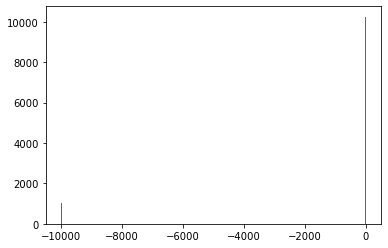

In [71]:
plt.hist(rat_list,bins=1000)

In [73]:
incl_list

[1.188050654078803,
 0.9578140884777914,
 1.237234652823882,
 1.4980049806928508,
 1.031910603682927,
 1.042971299671105,
 0.5869687736345583,
 0.44192998952147905,
 0.32792060605412854,
 0.9413034573926715,
 0.37569734435464813,
 0.5957279140419404,
 0.9802420827428943,
 0.539051338650144,
 0.914296624235917,
 0.7458482599230093,
 0.6255509298938552,
 0.7036500750219047,
 1.088132442144162,
 1.4443272971212515,
 0.8840401468665613,
 0.8376916908679872,
 0.4027374281728266,
 0.8194036311077326,
 0.3068570636395937,
 0.6196172889493327,
 0.3628803171868892,
 0.34942916384468137,
 0.34727516777446404,
 0.923351436479187,
 0.6212118466139331,
 0.8290052685808199,
 0.9725558158261146,
 1.1910581556463886,
 1.3373513853651993,
 0.49363206159345807,
 0.8383549179911083,
 0.6538115149561099,
 0.9551694455685213,
 0.29022614988009166,
 0.39672577638727646,
 0.8462407050693094,
 0.47318403098251577,
 0.30573900067511695,
 1.0130166945721486,
 0.13823561038269716,
 0.5820137747217181,
 1.1665681

In [74]:
min(incl_list)

0.07282570746201368

In [75]:
len(incl_list)

10246

In [76]:
0.07282570746201368 > 0

True